# Read in the SWE data from the netCDF file

All of these files can be accessed at https://rda.ucar.edu/datasets/ds612.0/

In this example, one file is converted to 3-hr sums.

In [1]:
import xarray as xr

ds = xr.open_dataset("../example_data/wrf2d_d01_CTRL_SNOW_ACC_NC_201301-201303.nc")

ds.SNOW_ACC_NC

<xarray.DataArray 'SNOW_ACC_NC' (Time: 2160, south_north: 1015, west_east: 1359)> Size: 12GB
[2979471600 values with dtype=float32]
Coordinates:
  * Time     (Time) datetime64[ns] 17kB 2013-01-01 ... 2013-03-31T23:00:00
    XLAT     (south_north, west_east) float32 6MB ...
    XLONG    (south_north, west_east) float32 6MB ...
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  ACCUMULATED SNOW WATER EQUIVALENT OVER prec_acc_dt PERIODS ...
    units:        mm
    stagger:      
    long_name:    SNOW_ACC_NC

## Examine the Time dimension

We see the data are from every hour.

In [2]:
ds.Time

<xarray.DataArray 'Time' (Time: 2160)> Size: 17kB
array(['2013-01-01T00:00:00.000000000', '2013-01-01T01:00:00.000000000',
       '2013-01-01T02:00:00.000000000', ..., '2013-03-31T21:00:00.000000000',
       '2013-03-31T22:00:00.000000000', '2013-03-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * Time     (Time) datetime64[ns] 17kB 2013-01-01 ... 2013-03-31T23:00:00
Attributes:
    long_name:    Time
    description:  Time

# Plot the data on a simple map

Text(0.5, 1.0, 'SWE Accumulation (mm) valid 2013-01-28 12:00:00')

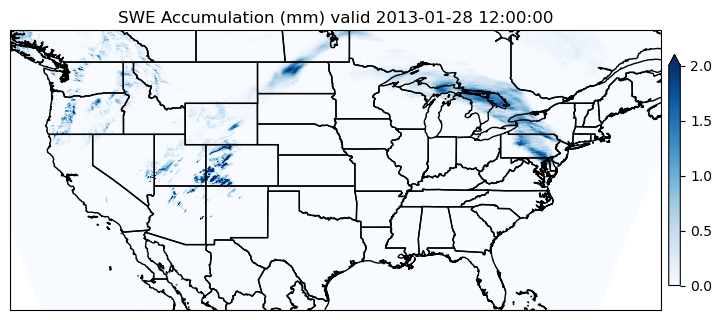

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 10

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-128, -65, 25, 48])

ax.add_feature(cfeature.STATES.with_scale('10m'))

example = ds.sel(Time='2013-01-28 12:00:00')

mmp = ax.pcolormesh(example.XLONG, example.XLAT, example.SNOW_ACC_NC, vmax=2, cmap='Blues')

plt.colorbar(mmp, ax=ax, shrink=0.3, pad=0.01, extend='max')

plt.title("SWE Accumulation (mm) valid 2013-01-28 12:00:00")

# To improve continuity in the tracking, we can combine multiple hours into 3-hr chunks

An example using three hours on 2013-01-28 from 12:00 UTC to 14:00 UTC

Text(0.5, 1.0, 'SWE Accumulation (mm) valid 2013-01-28 12 - 14 UTC')

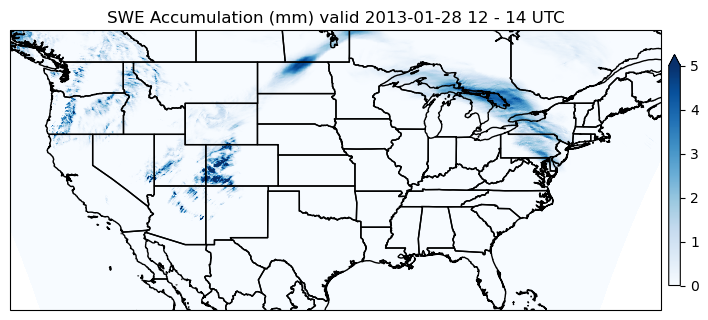

In [4]:
example1 = ds.sel(Time='2013-01-28 12:00:00')
example2 = ds.sel(Time='2013-01-28 13:00:00')
example3 = ds.sel(Time='2013-01-28 14:00:00')

total = example1.SNOW_ACC_NC + example2.SNOW_ACC_NC + example3.SNOW_ACC_NC

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-128, -65, 25, 48])

ax.add_feature(cfeature.STATES.with_scale('10m'))

example = ds.sel(Time='2013-01-28 12:00:00')

mmp = ax.pcolormesh(example.XLONG, example.XLAT, total.data, vmax=5, cmap='Blues')

plt.colorbar(mmp, ax=ax, shrink=0.3, pad=0.01, extend='max')

plt.title("SWE Accumulation (mm) valid 2013-01-28 12 - 14 UTC")

# Or, more simply..

Text(0.5, 1.0, 'SWE Accumulation (mm) valid 2013-01-28 12 - 14 UTC')

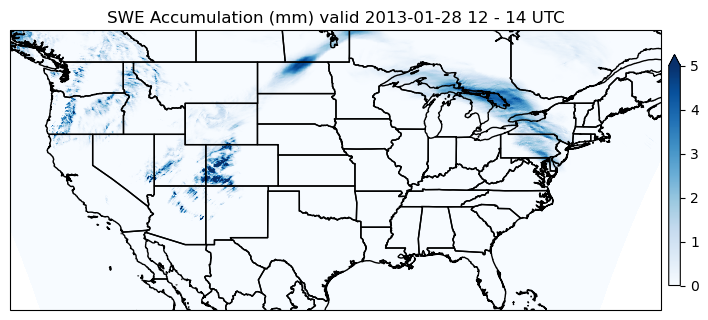

In [5]:
example_slice = ds.sel(Time=slice('2013-01-28 12:00:00', '2013-01-28 14:00:00'))

example_sum = example_slice.resample(Time='3h').sum('Time')

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-128, -65, 25, 48])

ax.add_feature(cfeature.STATES.with_scale('10m'))

mmp = ax.pcolormesh(example_slice.XLONG.values, example_slice.XLAT.values, example_sum.SNOW_ACC_NC.values[0], vmax=5, cmap='Blues')

plt.colorbar(mmp, ax=ax, shrink=0.3, pad=0.01, extend='max')

plt.title("SWE Accumulation (mm) valid 2013-01-28 12 - 14 UTC")

# Sanity check...

Check the total difference between the 3H resample and the manual 3H summation

In [6]:
import numpy as np

np.sum(total - example_sum.SNOW_ACC_NC.values[0])

<xarray.DataArray 'SNOW_ACC_NC' ()> Size: 4B
np.float32(0.0)
Coordinates:
    Time     datetime64[ns] 8B 2013-01-28T14:00:00

# Read in the 3H transformed dataset and compare

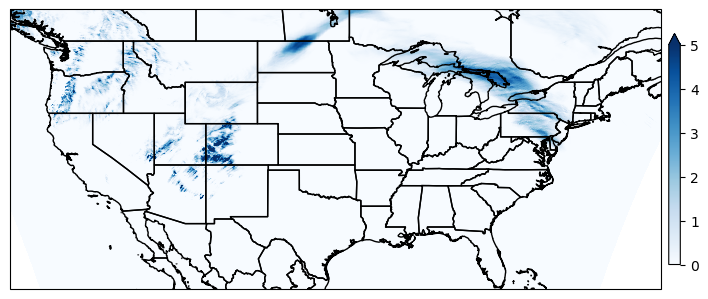

In [7]:
ds_3h = xr.open_dataset("../example_data/3H_sum_SNOW_ACC_CTRL_2012-2013.nc")

ds_3h_ex = ds_3h.sel(Time="2013-01-28 12:00:00")

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-128, -65, 25, 48])

ax.add_feature(cfeature.STATES.with_scale('10m'))

mmp = ax.pcolormesh(ds_3h_ex.XLONG.values, ds_3h_ex.XLAT.values, ds_3h_ex.SNOW_ACC_NC.values, vmax=5, cmap='Blues')

plt.colorbar(mmp, ax=ax, shrink=0.3, pad=0.01, extend='max')

# Find the difference between these data and the manual examples above

In [8]:
np.sum(ds_3h_ex.SNOW_ACC_NC.values - example_sum.SNOW_ACC_NC.values[0])

np.float32(0.0)

# The transformed data ("3H_sum_SNOW_ACC_*.nc") are used for the paper